In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

area = [2600, 3000, 3200, 3600, 4000]
bedrooms = [3, 4, np.nan, 3, 5]
age = [20,15, 18, 30, 8]
price = [550000, 565000, 610000, 595000, 760000]

df = pd.DataFrame({
    'Area' : area,
    'Bedrooms' : bedrooms,
    'Age' : age,
    'Price' : price
})


In [3]:
df['Bedrooms'].fillna(df['Bedrooms'].median(), inplace=True)

In [4]:
df.head()

,Area,Bedrooms,Age,Price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


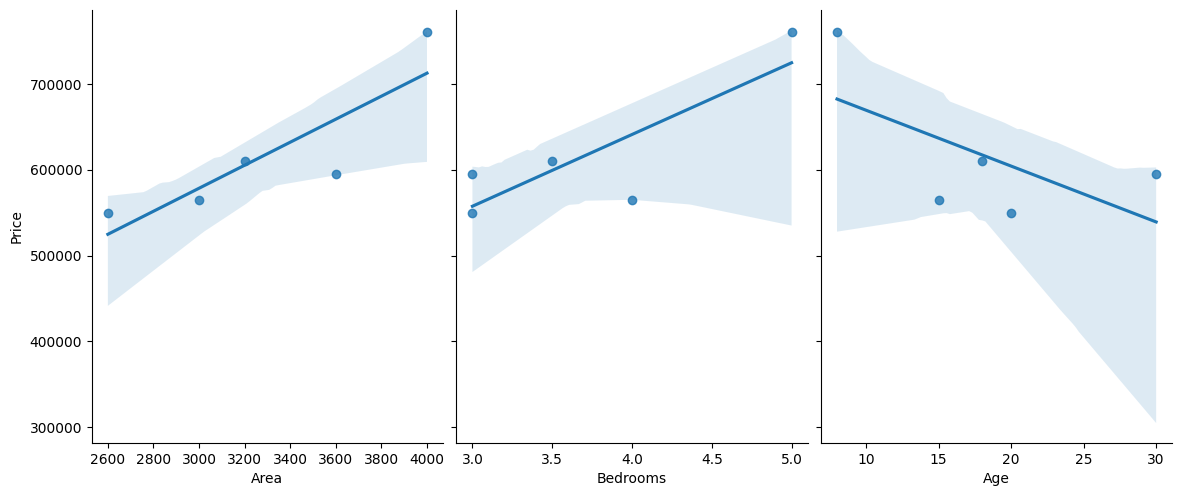

In [6]:
import seaborn as sns

sns.pairplot(df, x_vars=['Area', 'Bedrooms', 'Age'], y_vars='Price', height=5, aspect=0.8, kind='reg')

In [7]:
model = LinearRegression()

model.fit(df[['Area', 'Bedrooms', 'Age' ]], df['Price'])

coefficients = model.coef_  #m
intercept = model.intercept_                       #b

In [8]:
print("coefficients:", coefficients)
print("intercept:", intercept)

coefficients: [    198.47159002 -116583.73881651  -14267.77585936]
intercept: 656046.5390048665


In [9]:
predictions = model.predict(df[['Area', 'Bedrooms', 'Age']])

r_squared = model.score(df[['Area', 'Bedrooms', 'Age']], df['Price'])
print("R-squared:", r_squared)

R-squared: 0.9812392465259165


In [10]:
test_data={
    'Area': [3000, 2500, 3500, 2800],
    'Bedrooms': [3,2,4,3],
    'Age': [40,10,5,15]
}
#Covert data to DataFrame
test_df = pd.DataFrame(test_data)

#Making predictions using the model
predict_prices = model.predict(test_df)

#Display predicted prices
for i, price in enumerate(predict_prices):
    print(f"Predicted Price for House {i+1}: {price}")

Predicted Price for House 1: 330999.058232616
Predicted Price for House 2: 776380.2778213784
Predicted Price for House 3: 813023.2695024331
Predicted Price for House 4: 647999.1367132319
